In [12]:
!! pip install fancyimpute
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

- 결측치를 보간하는 다양한 방법들을 사각화하여 여러분들이 직접 어떤 식으로 되는구나 이 부분을 이해시키려고 하는 것
- 넘파이에서 랜ㄴ덤으로 데이터 만들어서 시각화

In [13]:
np.random.seed(0)
data = np.random.normal(10,2,100)
df = pd.DataFrame(data, columns=['Feature'])

df.loc[5:10, 'Feature'] = np.nan
df.loc[20:45, 'Feature'] = np.nan
df.loc[30:60, 'Feature'] = np.nan

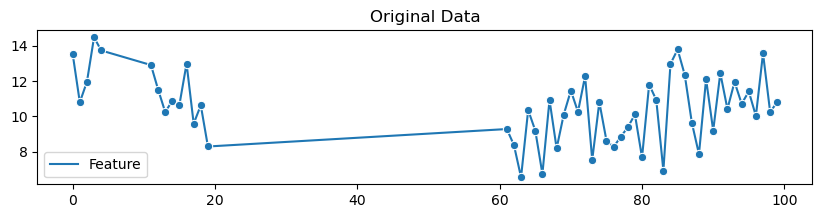

In [14]:
plt.figure(figsize=(10,2))
sns.lineplot(data=df, marker='o')
plt.title('Original Data')
plt.show()

In [15]:
# 1차 선형 보간법, interpolate
df_linear = df.interpolate(method = 'linear')

# 2차 선형보간법, interpolate
df_quadratic = df.interpolate(method = 'quadratic')

# 3 평균대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df)
df_mean = pd.DataFrame(df_mean, columns = ['Feature'])

# 4.0값을 대체
# fillna() 이 안에 원하는 값을 넣을 수 있다.
df_zero = df.fillna(0)

# 5. KNN 방법
KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df)
df_knn = pd.DataFrame(df_knn, columns=['Feature'])

# 6. MICE 다중대치법
mice_imputer = IterativeImputer()
df_mice = mice_imputer.fit_transform(df)
df_mice = pd.DataFrame(df_mice, columns=['Feature'])

NameError: name 'imputer_knn' is not defined